# 이미지 전이학습 구현예제
- resnet50을 이용해 mnist 분류

In [32]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# dataset

In [38]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.expand_dims(x_train, axis=-1) / 255.0
x_test = np.expand_dims(x_test, axis=-1) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
x_train = np.tile(x_train, (1, 1, 1, 3)) # rgb 흑백이어서 채널을 늘리는 것
x_test = np.tile(x_test, (1, 1, 1, 3))

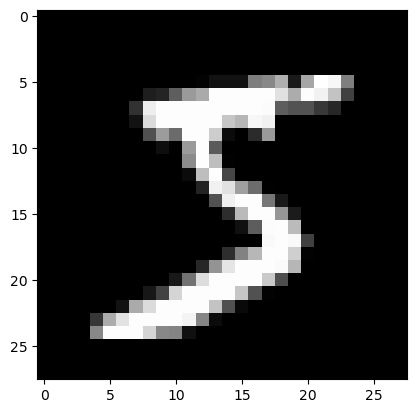

In [39]:
plt.imshow(x_train[0])

## 케라스 아키텍쳐 resnet50 전이학습 

### pretrained 모델 호출

In [7]:
source_model = ResNet50(weights='imagenet', include_top=False) # 마지막 레이어 호출 x

### last layer 생성 및 target 모델 생성

In [19]:
n1,n2 = 512,10

In [45]:
last_layer = source_model.output

last_layer = Dense(n1,activation='relu')(GlobalAveragePooling2D()(last_layer))

output = Dense(n2, activation='softmax')(last_layer)

model = Model(inputs=source_model.input, outputs=output)


for layer in source_model.layers:
    layer.trainable = False
    
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)


Epoch 1/5
1875/1875 [==============================] - 97s 50ms/step - loss: 0.5131 - accuracy: 0.8300 - val_loss: 0.2940 - val_accuracy: 0.9071
Epoch 2/5
1875/1875 [==============================] - 90s 48ms/step - loss: 0.3212 - accuracy: 0.8953 - val_loss: 0.3057 - val_accuracy: 0.9034
Epoch 3/5
1875/1875 [==============================] - 92s 49ms/step - loss: 0.2688 - accuracy: 0.9112 - val_loss: 0.2185 - val_accuracy: 0.9313
Epoch 4/5
1875/1875 [==============================] - 90s 48ms/step - loss: 0.2381 - accuracy: 0.9218 - val_loss: 0.2280 - val_accuracy: 0.9281
Epoch 5/5
1875/1875 [==============================] - 88s 47ms/step - loss: 0.2194 - accuracy: 0.9277 - val_loss: 0.1795 - val_accuracy: 0.9430
